In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2733.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2791.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2393.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_106.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2986.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_707.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_756.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1199.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1758.jpg
/kaggle/input/alzheimer-mr

In [2]:
### import numpy as np # linear algebra
import numpy as np
import pandas as pd 
import cv2
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import  ModelCheckpoint
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from xgboost import XGBRFRegressor
import xgboost as xgb
from sklearn.metrics import classification_report
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray
from matplotlib import image

import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
sns.set_palette('Paired')
sns.set_style("whitegrid")

In [3]:
#setting data to variables
path= '../input/alzheimer-mri-dataset/Dataset/'
class1 = '/kaggle/input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented/'
class2 = '/kaggle/input/alzheimer-mri-dataset/Dataset/Mild_Demented/'
class3 = '/kaggle/input/alzheimer-mri-dataset/Dataset/Moderate_Demented/'
class0 = '/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/'
stages= os.listdir(path)
for stage in stages: #created for loop to print stages
    print(stage)
print("number of stage:" ,len(stages)) #print number of 
data = os.walk(path)
img_files = []
for root, directiories, files in os.walk(path):
    for file in files:
        if file.endswith('.jpg'): 
            img_files.append(os.path.join(root, file))
print("The number of image files:" ,len(img_files))
def file_append(class_path):    
    image_array = []    
    curr_path = os.path.join(os.getcwd(),class_path)
    cnt = 0
    file_list = [k for k in os.listdir(curr_path) if '.jpg' in k]
    for x in file_list:
        
        img_path = os.path.join(curr_path,x)

        img = imread(img_path)
#         img = rgb2gray(img)
        img = resize(img,(60,60,3))     ## Will need to change this resize parameter
        img = img.flatten()
        image_array.append(img)
        
    return image_array
    

class1_img = file_append(class1)
class2_img = file_append(class2)
class3_img = file_append(class3)
class0_img = file_append(class0)


Non_Demented
Mild_Demented
Moderate_Demented
Very_Mild_Demented
number of stage: 4
The number of image files: 6400


['Non_Demented', 'Mild_Demented', 'Moderate_Demented', 'Very_Mild_Demented']

In [10]:
df1 = pd.DataFrame(class1_img)
df1['y']  = 1
df2 = pd.DataFrame(class2_img)
df2['y']  = 2
df3 = pd.DataFrame(class3_img)
df3['y']  = 3
df0 = pd.DataFrame(class0_img)
df0['y']  = 0

df = pd.concat([df0,df1,df2,df3],ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
df.isnull().sum().sum()

0

Text(0.5, 1.0, 'Class Wise Distribution of data')

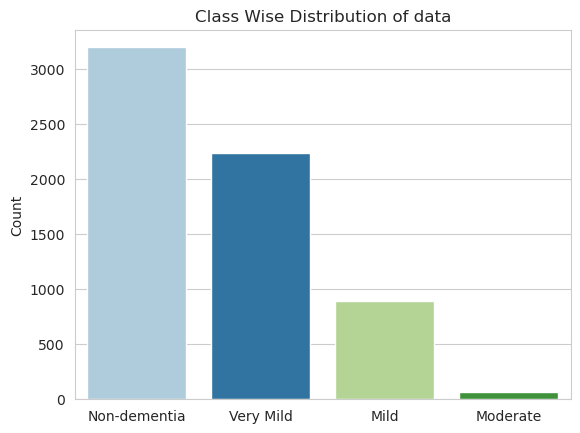

In [11]:
sns.barplot(x =['Non-dementia','Very Mild', 'Mild', 'Moderate'],y = df['y'].value_counts())
plt.ylabel('Count')
plt.title('Class Wise Distribution of data')

In [12]:
A = []
b = []

for file in img_files:
    img1 = cv2.imread(file)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
    img1 = img1.astype('float32') / 255.0  # normalize pixel values to [0,1]
    A.append(img1)
    label = file.split('/')[-2]  # get the label from the subfolder name
    b.append(label)

# Convert the lists to arrays
A = np.array(A)
b = np.array(b)

In [18]:
A

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

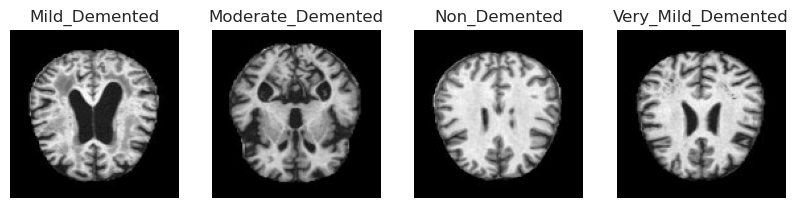

In [13]:
clas=np.unique(b)
selected_image={}

for label in clas:
    class_images= A[b==label]
    select= random.sample(list(class_images),4)
    selected_image[label]=select
fig, axs = plt.subplots(1, 4, figsize=(10,10))
for i in range(4):
   axs[i].imshow(selected_image[clas[i]][0])
   axs[i].set_title(clas[i])
   axs[i].axis("off")

In [14]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.4, random_state=123)
A_valid, A_test, b_valid,b_test = train_test_split(A_test, b_test, test_size=0.5, random_state=123)

label_encoder= LabelEncoder()

b_train= label_encoder.fit_transform(b_train)
b_valid= label_encoder.transform(b_valid)
b_train= to_categorical(b_train, num_classes=4)
b_valid= to_categorical(b_valid, num_classes=4)



In [18]:


model= Sequential()
model.add(Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape = (128,128, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.10))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=["accuracy"])
checkpoint = ModelCheckpoint(filepath = 'model_kaggle_alzheimer.h5',
                                                save_weights_only = False,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only = True)
compile_set= model.fit(A_train,b_train, epochs=20, validation_data=(A_valid,b_valid),callbacks=[checkpoint], batch_size=200)

Epoch 1/20
20/20 [==============================] - 39s 2s/step - loss: 1.0838 - accuracy: 0.4745 - val_loss: 0.9940 - val_accuracy: 0.5211
Epoch 2/20
20/20 [==============================] - 36s 2s/step - loss: 0.9465 - accuracy: 0.5490 - val_loss: 1.0245 - val_accuracy: 0.5102
Epoch 3/20
20/20 [==============================] - 36s 2s/step - loss: 0.8817 - accuracy: 0.5870 - val_loss: 0.8656 - val_accuracy: 0.6023
Epoch 4/20
20/20 [==============================] - 36s 2s/step - loss: 0.8291 - accuracy: 0.6286 - val_loss: 0.8071 - val_accuracy: 0.6461
Epoch 5/20
20/20 [==============================] - 36s 2s/step - loss: 0.7097 - accuracy: 0.7083 - val_loss: 0.7453 - val_accuracy: 0.6586
Epoch 6/20
20/20 [==============================] - 36s 2s/step - loss: 0.6069 - accuracy: 0.7578 - val_loss: 0.8102 - val_accuracy: 0.6266
Epoch 7/20
20/20 [==============================] - 36s 2s/step - loss: 0.5142 - accuracy: 0.8109 - val_loss: 0.5767 - val_accuracy: 0.7773
Epoch 8/20
20/20 [==

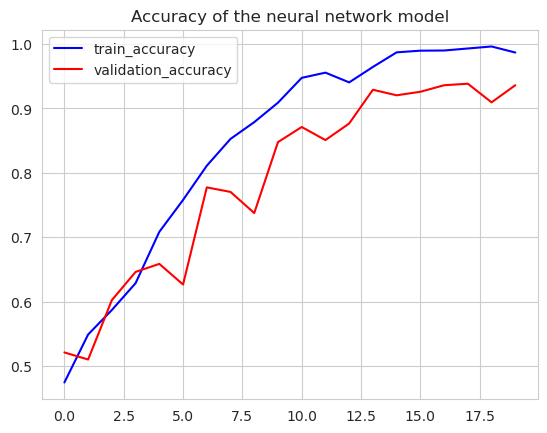

In [19]:
acc = compile_set.history['accuracy']
val_acc =  compile_set.history['val_accuracy']

loss = compile_set.history['loss']
val_loss = compile_set.history['val_loss']
plt.plot(compile_set.history['accuracy'], c='b', label='train_accuracy')
plt.plot(compile_set.history['val_accuracy'], c='r', label='validation_accuracy')
plt.title('Accuracy of the neural network model')
plt.legend()
plt.show()


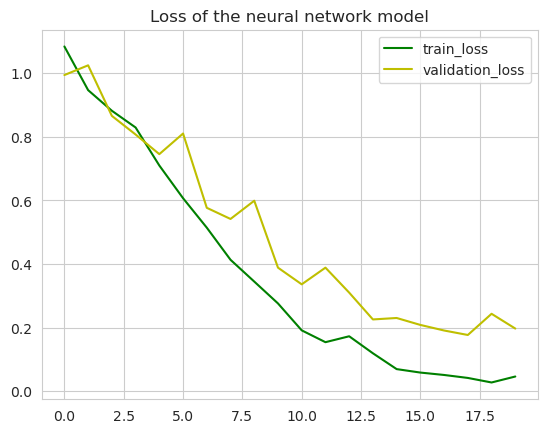

In [20]:
plt.plot(compile_set.history['loss'], c='g', label='train_loss')
plt.plot(compile_set.history['val_loss'], c='y', label='validation_loss')
plt.title('Loss of the neural network model')
plt.legend()
plt.show()

In [24]:
train_loss


NameError: name 'train_loss' is not defined

In [7]:
val_loss

NameError: name 'val_loss' is not defined

In [ ]:
train_acc

In [ ]:
val_acc

In [22]:
# Generate predictions for the validation dataset
b_pred = model.predict(A_valid)

# Get the predicted classes
b_pred_classes = np.argmax(b_pred, axis=1)

# Get the true classes
b_true = np.argmax(b_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Get the classification report
class_report = classification_report(b_true, b_pred_classes, target_names = class_names)

# Print the classification report
print(class_report)

40/40 [==============================] - 3s 69ms/step
                    precision    recall  f1-score   support

     Mild_Demented       0.97      0.90      0.94       169
 Moderate_Demented       1.00      0.88      0.93        16
      Non_Demented       0.90      0.99      0.95       665
Very_Mild_Demented       0.98      0.87      0.92       430

          accuracy                           0.94      1280
         macro avg       0.96      0.91      0.93      1280
      weighted avg       0.94      0.94      0.94      1280



In [ ]:

y_train

In [8]:
X,y = df[df.columns[:-1]],df['y']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=121)

NameError: name 'df' is not defined

In [ ]:
X_train

In [24]:
data_pipe = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=0.9))])
data_pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.9))])

In [92]:
X_train = data_pipe.transform(X_train)
X_test = data_pipe.transform(X_test)

y_train

1077    1
19      0
4599    0
5144    1
1627    1
       ..
2113    0
3572    3
1631    0
4565    1
3394    0
Name: y, Length: 5120, dtype: int64

In [93]:
X_train

array([[ 37.28889851,   4.27375228, -25.57913203, ...,   1.88236955,
          0.20675248,   0.33467436],
       [ 48.63875581,  33.17600304,  32.11216339, ...,   0.66110862,
         -0.08673541,  -0.51384905],
       [-45.77699047,   3.68237412,  31.77742974, ...,   0.40588818,
         -0.1331141 ,  -2.91295522],
       ...,
       [-16.65706217, -27.01815873, -22.08759879, ...,  -0.9825789 ,
         -1.13223787,   1.81929072],
       [ 54.06955655,   0.81273093,  11.31914183, ...,   1.5113785 ,
         -0.60347891,   0.07028718],
       [ 38.8207586 , -37.46158853,  40.93426266, ...,  -0.39704429,
         -0.71609625,  -0.60959486]])

In [6]:
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(X_train)
exp_var = pca.explained_variance_ratio_

print(f"Original Data dimension: {df.shape[1]} features")
print(f"After PCA Data dimension: {X_train.shape[1]} features")

NameError: name 'X_train' is not defined

Text(0.5, 1.0, 'Variance Ratio for top 10 Principal Components')

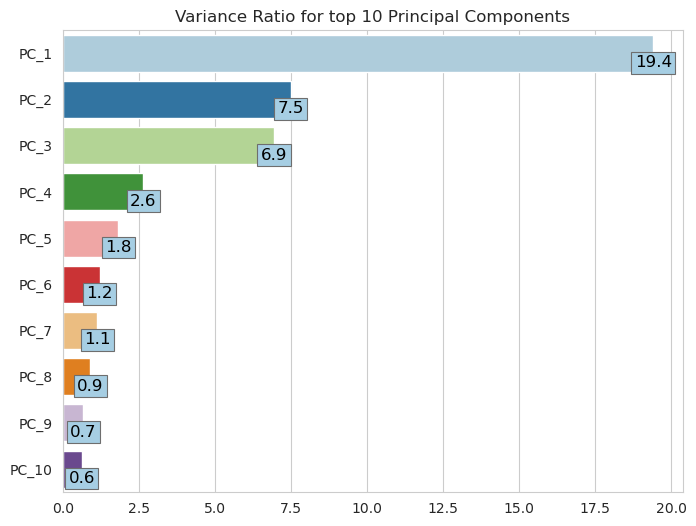

In [28]:
top10_var = [x*100 for x in data_pipe.named_steps['pca'].explained_variance_ratio_[:10]]
PC_labels = ['PC_'+str(x+1) for x in range(len(top10_var)) ]

plt.figure(figsize=(8,6))
plt.title("Variance Percentage for top 10 Principal Components")

bar = sns.barplot(x = top10_var,y = PC_labels)
for p in bar.patches:
    x = p.get_width()
    y = p.get_y()
    bar.annotate(format(x,'.1f'),(x,y),ha = 'center', va = 'center',size=12,color='black',xytext = (0, -20), textcoords = 'offset points',bbox = dict(boxstyle = 'square, pad = 0.2', lw = 0.8, ec = '#6e6e6e'))
#     print(p.get_width())
    
plt.title("Variance Ratio for top 10 Principal Components")

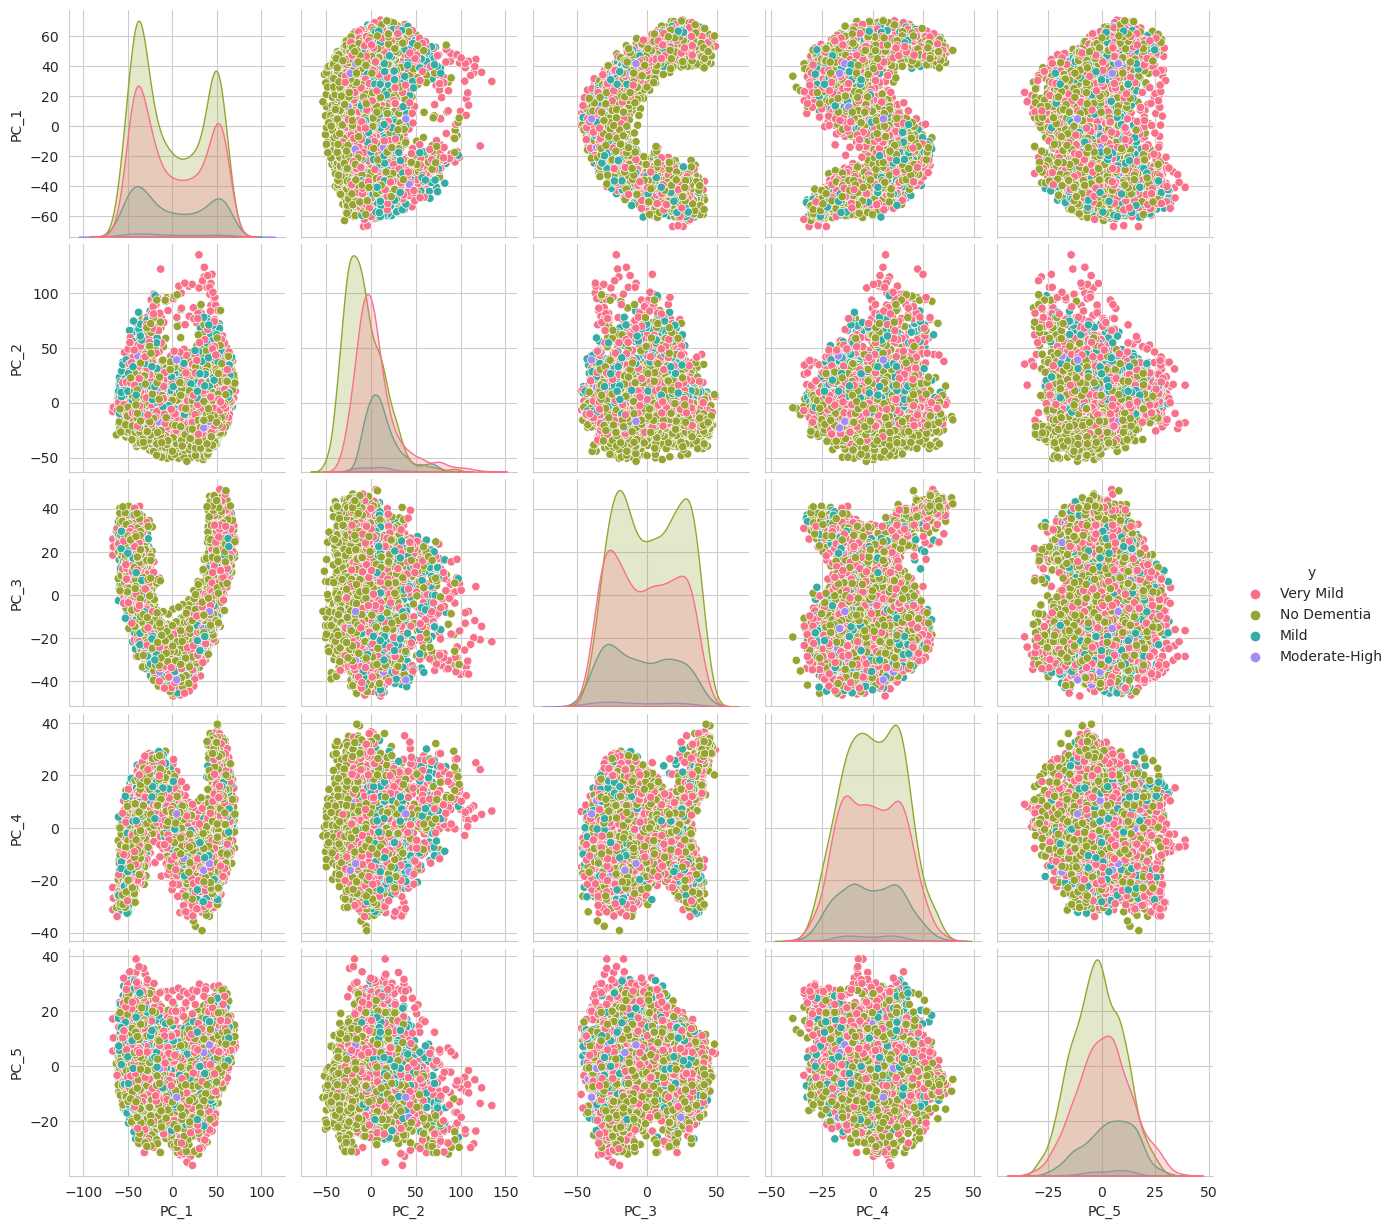

In [29]:
scatter_plots = X_train[:,:5]
data_cols = ['PC_'+str(x+1) for x in range(scatter_plots.shape[1]) ]
scatter_df = pd.DataFrame(scatter_plots,columns=data_cols)
scatter_df['y'] = y_train.reset_index(drop=True)

label_map = {0:'No Dementia',1:'Very Mild', 2: 'Mild',3:'Moderate-High'}
scatter_df['y'] = scatter_df['y'].map(label_map)

sns.pairplot(scatter_df,hue="y",palette="husl",)

In [31]:

def train_model(model,search_grid):
    cv = KFold(n_splits=10)
    grid_search = GridSearchCV(estimator=model, param_grid=search_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train,y_train)
    
    return grid_result

def scatter_plots(score_array,title):
    sns.set_palette('CMRmap')
    lr_scores = [max(score_array.cv_results_['split'+str(i)+'_test_score']) for i in range(0,10)]
    sns.lineplot(lr_scores)
    j = plt.scatter(range(1,11),lr_scores)
    
    plt.xlabel('Cross Validation Steps')
    plt.ylabel('Model Accuracy')
    plt.title(f'Cross Validation Accuracies for {title}',size=15)

    for i,j in enumerate(lr_scores):
        if j == max(lr_scores):
            plt.scatter(i+1,j,c='red',marker='o',s=200)
            plt.annotate(format(j,'.3f'),(i+1,j),size=15)
            
def cf_plot(score_array,title):
    plt.figure(figsize=(9,7))
    cf_matrix = confusion_matrix(y_test,y_pred=score_array.predict(X_test))
#     sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=0), annot=True, fmt='.2%', cmap='Blues',annot_kws={"size":15})

    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues',annot_kws={"size":15})

    plt.xlabel('Predicted Label',size=15)
    plt.ylabel('Actual Label',size=15)
    plt.title(f'Confusion Matrix for {title}',size=15)
    print(classification_report(y_test,y_pred=score_array.predict(X_test)))

In [33]:
lr_model = LogisticRegression(max_iter=10000, tol=0.1)

solvers = ['newton-cg']
penalty = ['l2','l3']
c_values = [ 1.0, 0.1, 0.01,0.001]
lr_search_grid = dict(solver=solvers,penalty=penalty,C=c_values)


lr_grid_result = train_model(lr_model,lr_search_grid)
lr_grid_result.cv_results_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    % (all_penalties, penalty)
ValueError: L

{'mean_fit_time': array([9.54081445e+01, 1.01630449e-02, 4.78964838e+01, 1.01172209e-02,
        1.75762953e+01, 1.04536295e-02, 9.80100899e+00, 1.02809429e-02]),
 'std_fit_time': array([1.69119827e+01, 2.15138665e-04, 6.54438538e+00, 1.45484418e-04,
        1.98209008e+00, 9.58849485e-05, 1.20992098e+00, 2.11078048e-04]),
 'mean_score_time': array([0.00261908, 0.        , 0.00250423, 0.        , 0.0028399 ,
        0.        , 0.00243483, 0.        ]),
 'std_score_time': array([0.00016349, 0.        , 0.00036873, 0.        , 0.00064041,
        0.        , 0.00132478, 0.        ]),
 'param_C': masked_array(data=[1.0, 1.0, 0.1, 0.1, 0.01, 0.01, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l3', 'l2', 'l3', 'l2', 'l3', 'l2', 'l3'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dty

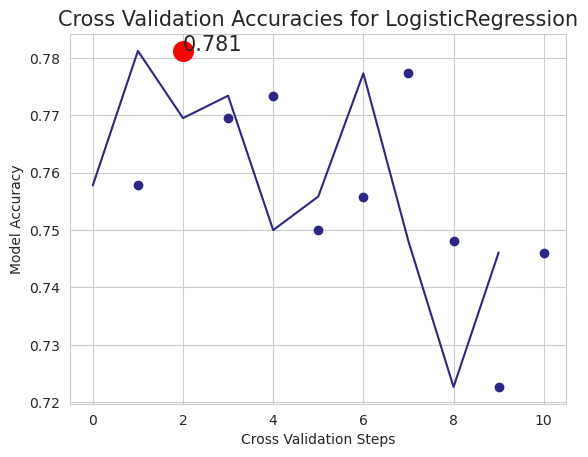

In [34]:
scatter_plots(lr_grid_result,'LogisticRegression')

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       643
           1       0.67      0.67      0.67       438
           2       0.78      0.66      0.72       190
           3       1.00      0.56      0.71         9

    accuracy                           0.75      1280
   macro avg       0.81      0.68      0.73      1280
weighted avg       0.75      0.75      0.75      1280



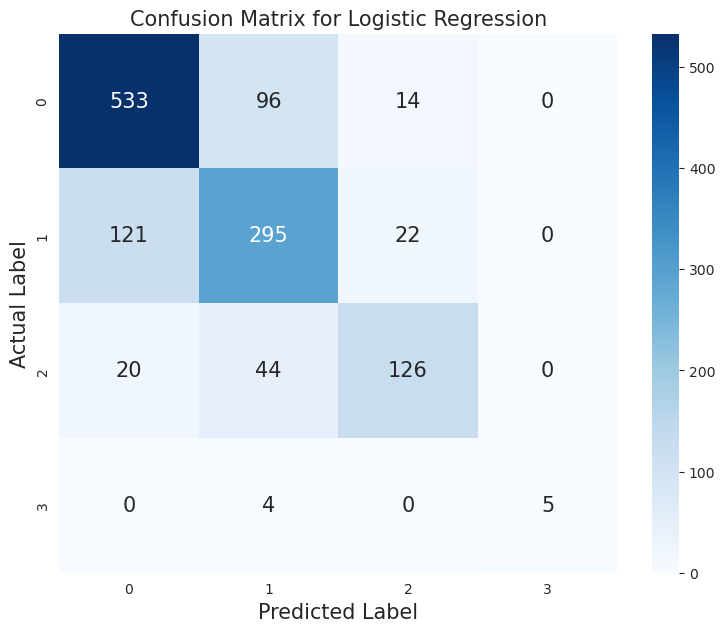

In [35]:
cf_plot(lr_grid_result,'Logistic Regression')

In [37]:
svm_model = SVC()
c_ = [0.5,1,2,5,10]
kernel = ['rbf','poly']

search_parameters = dict()
search_parameters['C'] = c_
search_parameters['kernel'] = kernel

svm_grid_result = train_model(svm_model,search_parameters)
svm_grid_result.best_params_

{'C': 10, 'kernel': 'rbf'}

In [38]:
svm_grid_result.score(X_test,y_test)

0.98515625

In [39]:

svm_grid_result.best_params_

{'C': 10, 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       643
           1       0.98      0.98      0.98       438
           2       1.00      0.98      0.99       190
           3       1.00      1.00      1.00         9

    accuracy                           0.99      1280
   macro avg       0.99      0.99      0.99      1280
weighted avg       0.99      0.99      0.99      1280



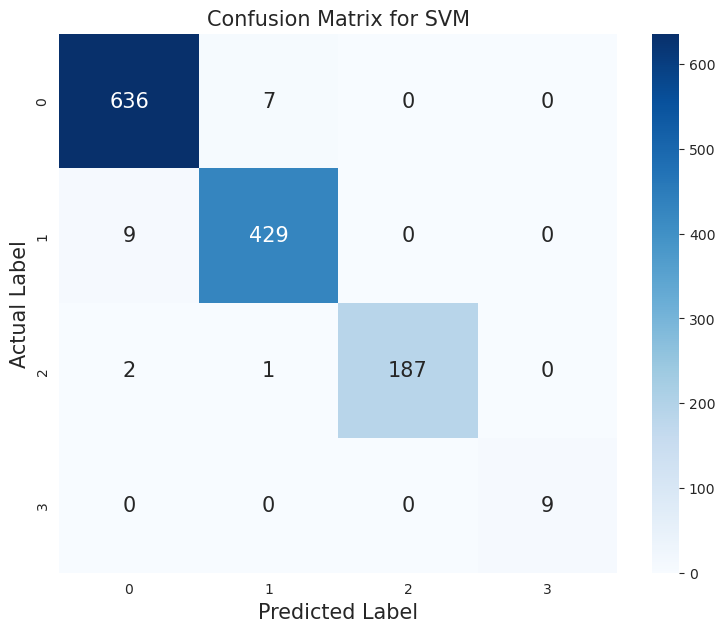

In [40]:
cf_plot(svm_grid_result,'SVM')

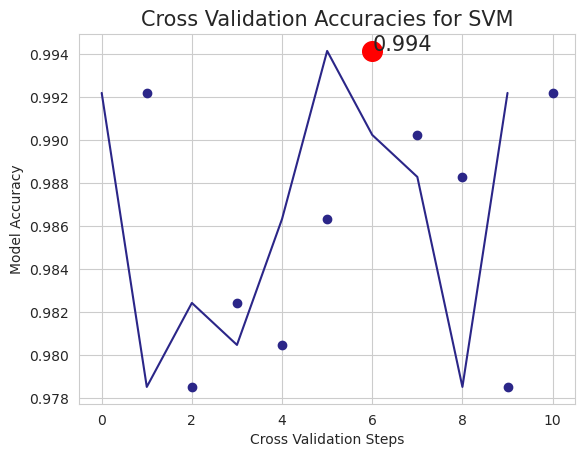

In [42]:
scatter_plots(svm_grid_result,'SVM')

In [42]:
boosted_tree_model=GradientBoostingClassifier()
n_estimators = [10, 100, 500,1000]
max_features = ['sqrt', 'log2']

rf_grid = dict(n_estimators=n_estimators,max_features=max_features)
rf_grid_result  = train_model(boosted_tree_model,rf_grid)

rf_grid_result.best_params_

{'max_features': 'sqrt', 'n_estimators': 1000}

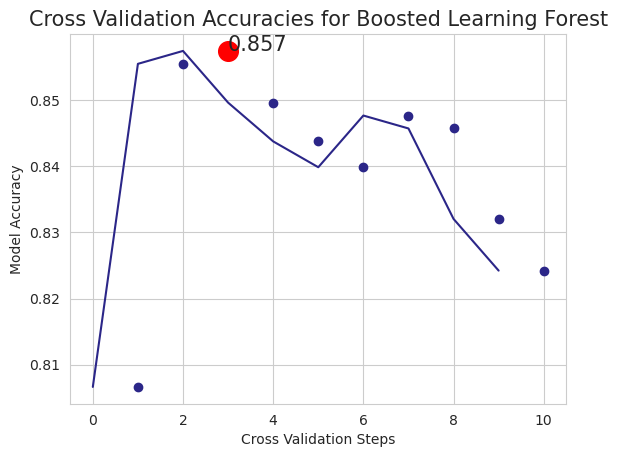

In [43]:
scatter_plots(rf_grid_result,'Boosted Learning Forest')

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       643
           1       0.82      0.81      0.81       438
           2       0.99      0.65      0.78       190
           3       0.50      0.11      0.18         9

    accuracy                           0.84      1280
   macro avg       0.79      0.62      0.66      1280
weighted avg       0.85      0.84      0.84      1280



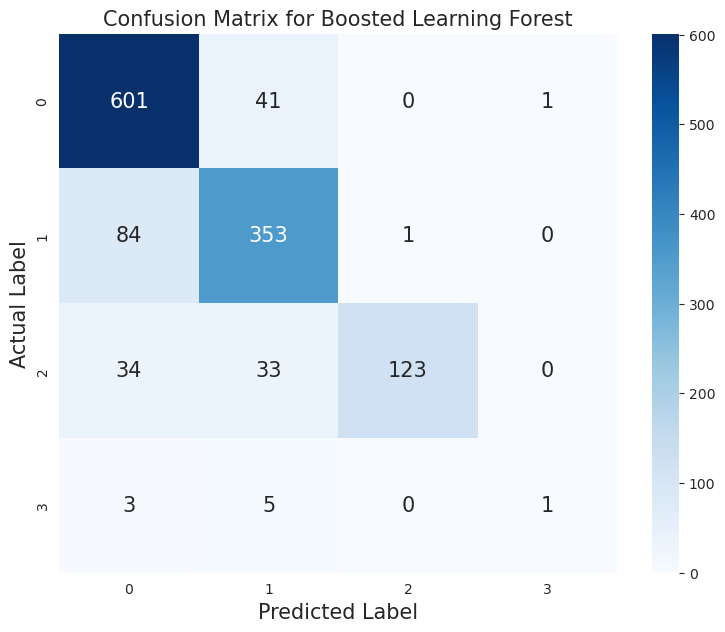

In [44]:
cf_plot(rf_grid_result,'Boosted Learning Forest')

In [101]:
estimators=[('gbc',GradientBoostingClassifier(n_estimators = [10, 100, 500,1000],max_features = ['sqrt', 'log2'])),('svc', SVC(C = [0.5,1,2,5,10],
kernel = ['rbf','poly'])),('lr',LogisticRegression(max_iter=10000, tol=0.1,solver = ['newton-cg'],penalty = ['l2','l3'],C = [ 1.0, 0.1, 0.01,0.001]))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),cv=10)
clf.fit(X_train, y_train)


ValueError: y should be a 1d array, got an array of shape (3840, 4) instead.

In [97]:
y=list(y_train)